<a href="https://colab.research.google.com/github/Kanabee/Learning_ML/blob/main/Weather_predicted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)

# 2. Read Data

In [318]:
data = pd.read_excel('rice_dataset.xlsx')

data

,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,DRY,DESERT,10-20,NORMAL,17.0
1,DRY,DESERT,10-20,SUNNY,18.5
2,DRY,DESERT,10-20,WINDY,18.0
3,DRY,DESERT,10-20,RAINY,9.0
4,DRY,DESERT,20-30,NORMAL,18.0
...,...,...,...,...,...
187,WET,HUMID,30-40,RAINY,0.5
188,WET,HUMID,40-50,NORMAL,7.0
189,WET,HUMID,40-50,SUNNY,8.5
190,WET,HUMID,40-50,WINDY,8.0


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SOIL TYPE          192 non-null    object 
 1   REGION             192 non-null    object 
 2   TEMPERATURE        192 non-null    object 
 3   WEATHER CONDITION  192 non-null    object 
 4   WATER REQUIREMENT  192 non-null    float64
dtypes: float64(1), object(4)
memory usage: 7.6+ KB


### 3.1.2. Remove Missing Values (Listwise Deletion)

In [320]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [321]:
data.describe()

,WATER REQUIREMENT
count,192.000000
mean,10.800521
std,5.240124
min,0.200000
25%,7.375000
50%,11.000000
75%,14.500000
max,21.500000


### 3.2.2. Remove Outliers

In [322]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [323]:
target_name = 'WATER REQUIREMENT'
feature_name = list(data.columns.drop(target_name))

In [324]:
X = data[feature_name]
y = data[target_name]

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

In [326]:
numerical_feature = []
categorical_feature = ['SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION']

In [327]:
for feature in categorical_feature:
    print(feature, ':', np.unique(X_train[feature]))

SOIL TYPE : ['DRY' 'HUMID' 'WET']
REGION : ['DESERT' 'HUMID' 'SEMI ARID' 'SEMI HUMID']
TEMPERATURE : ['10-20' '20-30' '30-40' '40-50']
WEATHER CONDITION : ['NORMAL' 'RAINY' 'SUNNY' 'WINDY']


In [328]:
ordinal_feature = ['SOIL TYPE', 'REGION', 'TEMPERATURE']
nominal_feature = ['WEATHER CONDITION']

## 5.1. Ordinal Encoding

### 5.1.1. Training Set

In [329]:
categories = [
    np.array(['DRY', 'HUMID', 'WET'], dtype=object),
    np.array(['DESERT', 'SEMI ARID', 'SEMI HUMID', 'HUMID'], dtype=object),
    np.array(['10-20', '20-30', '30-40', '40-50'], dtype=object)
]

In [330]:
ordinal_encoder = OrdinalEncoder(categories=categories)
X_train[ordinal_feature] = ordinal_encoder.fit_transform(X_train[ordinal_feature])

### 5.1.2. Test Set

In [331]:
X_test[ordinal_feature] = ordinal_encoder.transform(X_test[ordinal_feature])

## 5.2. One Hot Encoding

### 5.2.1. Training Set

In [332]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
one_hot_encoder.fit(X_train[nominal_feature])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [333]:
one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

In [334]:
X_train[one_hot_feature] = one_hot_encoder.transform(X_train[nominal_feature])
X_train.drop(nominal_feature, axis=1, inplace=True)

### 5.2.2. Test Set

In [335]:
X_test[one_hot_feature] = one_hot_encoder.transform(X_test[nominal_feature])
X_test.drop(nominal_feature, axis=1, inplace=True)

# 6. Model Creation

In [337]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [338]:
reg.intercept_

15.599996404636313

In [339]:
reg.coef_

array([-3.37598741, -1.90065498,  0.96968685,  1.27990538, -6.30806327,
        2.77334502,  2.25481287])

# 7. Prediction

## 7.1. Training Set

In [340]:
y_pred_train = reg.predict(X_train)

## 7.2. Test Set

In [341]:
y_pred_test = reg.predict(X_test)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Scoring

In [342]:
print('r2_score =\t\t\t', r2_score(y_train, y_pred_train))
print('mean_squared_error =\t\t', mean_squared_error(y_train, y_pred_train))
print('mean_absolute_error =\t\t', mean_absolute_error(y_train, y_pred_train))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_train, y_pred_train))

r2_score =			 0.9888797894246566
mean_squared_error =		 0.3292848691844302
mean_absolute_error =		 0.39795996577498327
mean_absolute_percentage_error = 0.28885229454281697


### 8.1.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

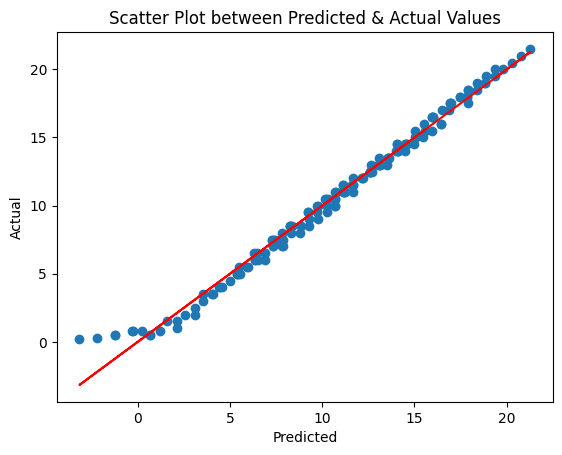

In [343]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 8.2. Test Set

### 8.2.1. Scoring

In [344]:
print('r2_score =\t\t\t', r2_score(y_test, y_pred_test))
print('mean_squared_error =\t\t', mean_squared_error(y_test, y_pred_test))
print('mean_absolute_error =\t\t', mean_absolute_error(y_test, y_pred_test))
print('mean_absolute_percentage_error =', mean_absolute_percentage_error(y_test, y_pred_test))

r2_score =			 0.9901959840908796
mean_squared_error =		 0.1769589419862183
mean_absolute_error =		 0.3349266410936961
mean_absolute_percentage_error = 0.041137593197438295


### 8.2.2. Scatter Plot between Predicted & Actual Values

Text(0, 0.5, 'Actual')

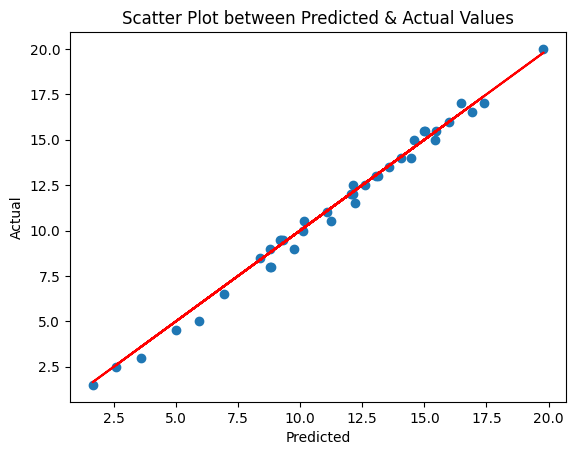

In [345]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 9. Save Model

In [347]:
import pickle

In [348]:
pickle.dump((reg,
             ordinal_encoder,
             one_hot_encoder,
             feature_name,
             numerical_feature,
             ordinal_feature,
             nominal_feature),
            open('rice_model.pickle', 'wb'))

In [349]:
saved_model = pickle.load(open('rice_model.pickle', 'rb'))

In [350]:
reg = saved_model[0]
ordinal_encoder = saved_model[1]
one_hot_encoder = saved_model[2]
feature_name = saved_model[3]
numerical_feature = saved_model[4]
ordinal_feature = saved_model[5]
nominal_feature = saved_model[6]

In [351]:
feature_name

['SOIL TYPE', 'REGION', 'TEMPERATURE', 'WEATHER CONDITION']

In [352]:
SOIL_TYPE = 'HUMID'
REGION = 'DESERT'
TEMPERATURE = '30-40'
WEATHER_CONDITION = 'NORMAL'

In [353]:
incoming_data = pd.DataFrame(np.array([[SOIL_TYPE, REGION, TEMPERATURE, WEATHER_CONDITION]]),
                             columns=feature_name)

incoming_data

,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION
0,HUMID,DESERT,30-40,NORMAL


In [354]:
print('numerical_feature :', numerical_feature)
print('ordinal_feature :', ordinal_feature)
print('nominal_feature :', nominal_feature)

numerical_feature : []
ordinal_feature : ['SOIL TYPE', 'REGION', 'TEMPERATURE']
nominal_feature : ['WEATHER CONDITION']


In [355]:
incoming_data[ordinal_feature] = ordinal_encoder.transform(incoming_data[ordinal_feature])

In [356]:

one_hot_feature = []
for i, feature in enumerate(nominal_feature):
    for cate in one_hot_encoder.categories_[i]:
        one_hot_feature_name = str(feature) + '_' + str(cate)
        one_hot_feature.append(one_hot_feature_name)

incoming_data[one_hot_feature] = one_hot_encoder.transform(incoming_data[nominal_feature])
incoming_data.drop(nominal_feature, axis=1, inplace=True)

In [357]:
incoming_data

,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION_NORMAL,WEATHER CONDITION_RAINY,WEATHER CONDITION_SUNNY,WEATHER CONDITION_WINDY
0,1.0,0.0,2.0,1.0,0.0,0.0,0.0


In [358]:
predicted_target = reg.predict(incoming_data)

In [359]:
predicted_target

array([15.44328807])